<a href="https://colab.research.google.com/github/Harun2703/Python/blob/master/icp-6/ICP_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required Libraries

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Remove any null values by the mean.


In [6]:
dataset = pd.read_csv("/content/drive/My Drive/Python Deep learning/ICP-6/CC.csv")

In [7]:
X = dataset.iloc[:, 1:]

In [8]:
X = X.select_dtypes(include=[np.number]).interpolate().fillna(X.select_dtypes(include=[np.number]).interpolate().mean(axis=0))

# Elbow Method

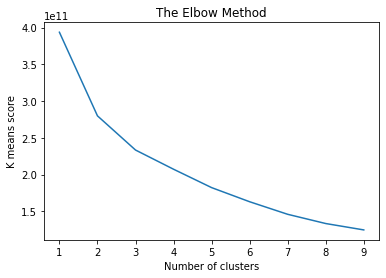

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("K means score")
plt.show()

# KMeans Model without scaling

In [28]:
# k=3
kmeans = KMeans(n_clusters=4, random_state=40)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=40, tol=0.0001, verbose=0)

In [29]:
y_cluster_kmeans = kmeans.predict(X)

# Calculating score

In [30]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)

# Data Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)

# KMeans Model after Scaling

In [32]:
scaled_kmeans = KMeans(n_clusters=4, random_state=42)
scaled_kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [33]:
y_scaled_kmeans = scaled_kmeans.predict(X_scaled)

In [34]:
scaled_score = metrics.silhouette_score(X, y_scaled_kmeans)

# Applying PCA on data

In [35]:
from sklearn.decomposition import PCA
pca = PCA(3)
X_pca = pca.fit_transform(X)

# KMeans model after applying PCA

In [36]:
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(X_pca)
y_pca_kmeans= kmeans_pca.predict(X_pca)
pca_score = metrics.silhouette_score(X_pca, y_pca_kmeans)

# KMeans Model after applying PCA on scaled Data

In [37]:
pca_scaled = PCA(2)
X_pca_scaled= pca_scaled.fit_transform(X_scaled)

In [38]:
kmeans_pca_scaled = KMeans(n_clusters=3)
kmeans_pca_scaled.fit(X_pca_scaled)
y_pca_kmeans_scaled = kmeans_pca_scaled.predict(X_pca_scaled)
pca_scaled_score = metrics.silhouette_score(X_pca_scaled, y_pca_kmeans_scaled)
y_pca_kmeans_scaled

array([0, 2, 0, ..., 0, 0, 0], dtype=int32)

# Score comparisons

In [39]:
print("Score before Scaling :", score)
print("Score after Scaling :", scaled_score)
print("Score after applying PCA:",pca_score)
print("Score after applying PCA on scaled data:",pca_scaled_score)

Score before Scaling : 0.46489826886310515
Score after Scaling : 0.04301267474277744
Score after applying PCA: 0.511227493848796
Score after applying PCA on scaled data: 0.4508217485997737


# Plotting Clusters

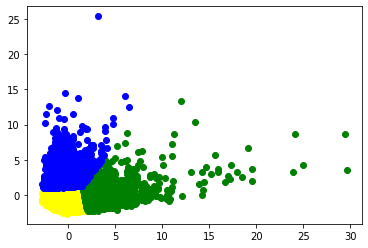

In [41]:
colors = ["yellow", "green", "blue"]
for i in range(3):
    x_axis = X_pca_scaled[y_pca_kmeans_scaled == i][:,0]
    y_axis = X_pca_scaled[y_pca_kmeans_scaled == i][:,1]
    plt.scatter(x_axis,y_axis,color=colors[i]) 